<a href="https://colab.research.google.com/github/sachinkavindaa/ML-Project/blob/master/ModelwithOptimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [6]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [7]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
print(df.groupby('Outcome').size())


Outcome
0    500
1    268
dtype: int64


In [8]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
df_mod.shape

(724, 9)

In [9]:
def min_max_scaling(df_mod):
    
    df_norm = df_mod.copy()
    
    
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

df_scaled = min_max_scaling(df_mod)


In [10]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_scaled[feature_names]
y = df_scaled.Outcome

In [11]:
from collections import Counter

target = df_mod['Outcome'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=249, Percentage=34.392%
Class=0, Count=475, Percentage=65.608%


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=3)

In [42]:
#def prepare_data(df_scaled):
	#n_train = 200
	#trainX, testX = X.iloc[:n_train, :], X.iloc[n_train:, :]
	#trainy, testy = y.iloc[:n_train], y.iloc[n_train:]
	#return trainX, trainy, testX, testy


In [82]:
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(3, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_data=(X_test,y_test))

In [84]:
# predict test set
yhat=model.predict(X_test)
pr = np.round(yhat)
# evaluate predictions
score = accuracy_score(y_test, pr)
print('Accuracy: %.3f' % score)

Accuracy: 0.768


In [85]:
# evaluate the model
b ,train_acc = model.evaluate(X_train, y_train, verbose=0)
m ,test_acc = model.evaluate(X_test, y_test, verbose=0)
print(b)
print(m)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

0.44597649574279785
0.45517921447753906
Train: 0.777, Test: 0.768


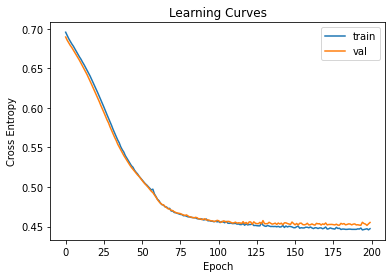

In [86]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

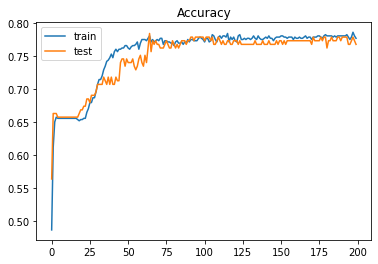

In [87]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [88]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
	# define model
	model = Sequential()
	model.add(Dense(10, input_shape=(n_features,), activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('opt='+optimizer, pad=-80)
	#pyplot.figure(figsize = (5,4))

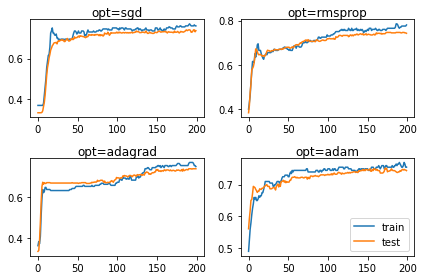

In [89]:
trainX, trainy, testX, testy = prepare_data(df_scaled)
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
 
	# fit model and plot learning curves for an optimizer
	fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.legend()
pyplot.tight_layout()
pyplot.show()
